In [1]:
import pandas as pd
import seaborn as sns
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import requests
import time
import re

In [ ]:
# Define categories and their URLs
categories = {
    : "https://www.jumia.co.ke/catalog/?q=phones&page=",
    "Skinc"Laptops": "https://www.jumia.co.ke/catalog/?q=laptop&page=",
    "Phones"are": "https://www.jumia.co.ke/catalog/?q=skincare&page=",
    "Home Appliances": "https://www.jumia.co.ke/catalog/?q=home+appliances&page=",
    "TVs": "https://www.jumia.co.ke/catalog/?q=tv&page=",
    "Watches": "https://www.jumia.co.ke/catalog/?q=watches&page=",
    "Shoes": "https://www.jumia.co.ke/catalog/?q=shoes&page=",
    "Kitchen Appliances": "https://www.jumia.co.ke/catalog/?q=kitchen+appliances&page="
}

In [3]:
# Function to extract product details
def scrape_products(category, base_url, max_pages=5):
    products = []
    
    for page in range(1, max_pages + 1):
        url = f"{base_url}{page}"
        response = requests.get(url)
        if response.status_code != 200:
            print(f"Failed to retrieve {category} data on page {page}")
            continue
        
        soup = BeautifulSoup(response.content, 'html.parser')
        
        # Extract product details
        for item in soup.find_all('article', class_='prd _fb col c-prd'):
            name = item.find('h3', class_='name')
            price = item.find('div', class_='prc')
            old_price = item.find('div', class_='old')
            discount = item.find('div', class_='bdg _dsct')
            rating = item.find('div', class_='stars _s')
            review_count = item.find('div', class_='rev')
            
            products.append({
                "Name": name.text.strip() if name else None,
                "Brand": name.text.split()[0] if name else None,
                "Price": price.text.strip() if price else None,
                "Old Price": old_price.text.strip() if old_price else None,
                "Discount": discount.text.strip() if discount else None,
                "Rating": rating.get('aria-label', None) if rating else None,
                "Review Count": review_count.text.strip() if review_count else None,
                "Type of Product": category
            })
        
        print(f"Scraped {category} - Page {page}")
        time.sleep(2)  # Avoid getting blocked
    
    return products

In [4]:
# Scrape all categories
data = []
for category, url in categories.items():
    print(f"Scraping {category}...")
    data.extend(scrape_products(category, url))
    time.sleep(2)  # Avoid getting blocked by the website
print('Congratulations!Scrapping Complete!!')

Scraping Laptops...
Scraped Laptops - Page 1
Scraped Laptops - Page 2
Scraped Laptops - Page 3
Scraped Laptops - Page 4
Scraped Laptops - Page 5
Scraping Phones...
Scraped Phones - Page 1
Scraped Phones - Page 2
Scraped Phones - Page 3
Scraped Phones - Page 4
Scraped Phones - Page 5
Scraping Skincare...
Scraped Skincare - Page 1
Scraped Skincare - Page 2
Scraped Skincare - Page 3
Scraped Skincare - Page 4
Scraped Skincare - Page 5
Scraping Home Appliances...
Scraped Home Appliances - Page 1
Scraped Home Appliances - Page 2
Scraped Home Appliances - Page 3
Scraped Home Appliances - Page 4
Scraped Home Appliances - Page 5
Scraping TVs...
Scraped TVs - Page 1
Scraped TVs - Page 2
Scraped TVs - Page 3
Scraped TVs - Page 4
Scraped TVs - Page 5
Scraping Watches...
Scraped Watches - Page 1
Scraped Watches - Page 2
Scraped Watches - Page 3
Scraped Watches - Page 4
Scraped Watches - Page 5
Scraping Shoes...
Scraped Shoes - Page 1
Scraped Shoes - Page 2
Scraped Shoes - Page 3
Scraped Shoes - Pag

In [5]:
# Convert to DataFrame and save as CSV
df = pd.DataFrame(data)
df.to_csv("jumia_products.csv", index=False)
print("Scraping completed! Data saved to jumia_products.csv")

Scraping completed! Data saved to jumia_products.csv


In [50]:
df=pd.read_csv('jumia_products.csv')
df.head(5)

,Name,Brand,Price,Old Price,Discount,Rating,Review Count,Type of Product
0,"HP Chromebook 11 G6 EE, Intel Celeron Dual N33...",HP,"KSh 8,999","KSh 16,799",NaN,NaN,3.9 out of 5(48),Laptops
1,HP Refurbished EliteBook 8470p Core I5 - HDD 5...,HP,"KSh 13,999","KSh 23,000",NaN,NaN,3.8 out of 5(50),Laptops
2,Lenovo Refurbished ThinkPad Yoga 11e X360 Int...,Lenovo,"KSh 11,499","KSh 22,500",NaN,NaN,4 out of 5(167),Laptops
3,"Lenovo ThinkPad X260 Intel Core I5, 8GB RAM, 2...",Lenovo,"KSh 15,795","KSh 28,000",NaN,NaN,4 out of 5(43),Laptops
4,"HP EliteBook 840 G6-8th Gen -Core I5, 16GB RAM...",HP,"KSh 29,999","KSh 36,000",NaN,NaN,3 out of 5(4),Laptops


EDA

In [51]:
# Function to clean and extract product details
def clean_product_name(name):
    if not isinstance(name, str):
        return None, None, None
    
    # Extract storage (RAM and SSD/HDD sizes)
    storage_match = re.findall(r'\b(\d+GB\s*(?:RAM|SSD|HDD))\b', name, re.IGNORECASE)
    storage = ', '.join(storage_match) if storage_match else "N/A"
    
    # Remove storage details and extra info to clean the name
    clean_name = re.sub(r'\b(\d+GB\s*(?:RAM|SSD|HDD))\b', '', name, flags=re.IGNORECASE)
    clean_name = clean_name.split(',')[0].strip()  # Keep the first main part
    
    # Extract remaining details
    more_details = name.replace(clean_name, '').strip().strip(',')
    
    return clean_name, storage, more_details

In [52]:
# Apply the function to clean names and extract storage
df[['Clean Name', 'Storage', 'More Details']] = df.apply(
    lambda row: pd.Series(clean_product_name(row['Name'])), axis=1
)

df.head(5)

,Name,Brand,Price,Old Price,Discount,Rating,Review Count,Type of Product,Clean Name,Storage,More Details
0,"HP Chromebook 11 G6 EE, Intel Celeron Dual N33...",HP,"KSh 8,999","KSh 16,799",NaN,NaN,3.9 out of 5(48),Laptops,HP Chromebook 11 G6 EE,"4GB RAM, 16GB SSD","Intel Celeron Dual N3350 , Storage 4GB RAM/16..."
1,HP Refurbished EliteBook 8470p Core I5 - HDD 5...,HP,"KSh 13,999","KSh 23,000",NaN,NaN,3.8 out of 5(50),Laptops,HP Refurbished EliteBook 8470p Core I5 - HDD 5...,8GB RAM,HP Refurbished EliteBook 8470p Core I5 - HDD 5...
2,Lenovo Refurbished ThinkPad Yoga 11e X360 Int...,Lenovo,"KSh 11,499","KSh 22,500",NaN,NaN,4 out of 5(167),Laptops,Lenovo Refurbished ThinkPad Yoga 11e X360 Int...,4GB RAM,Lenovo Refurbished ThinkPad Yoga 11e X360 Int...
3,"Lenovo ThinkPad X260 Intel Core I5, 8GB RAM, 2...",Lenovo,"KSh 15,795","KSh 28,000",NaN,NaN,4 out of 5(43),Laptops,Lenovo ThinkPad X260 Intel Core I5,"8GB RAM, 256GB SSD","8GB RAM, 256GB SSD, 12.5'' REFURBISHED"
4,"HP EliteBook 840 G6-8th Gen -Core I5, 16GB RAM...",HP,"KSh 29,999","KSh 36,000",NaN,NaN,3 out of 5(4),Laptops,HP EliteBook 840 G6-8th Gen -Core I5,16GB RAM,"16GB RAM, 256GB-SSD-Refurbished-14""- Silver-W..."


In [53]:
df.tail(5)

,Name,Brand,Price,Old Price,Discount,Rating,Review Count,Type of Product,Clean Name,Storage,More Details
1595,"RAF Machine for Home, Prodution Time for Ice C...",RAF,"KSh 29,000","KSh 58,000",NaN,NaN,NaN,Kitchen Appliances,RAF Machine for Home,N/A,Prodution Time for Ice Cubes in 6 Min Make 15...
1596,25kg Countertop Ice Maker Portable Clear Ice C...,25kg,"KSh 39,499","KSh 40,999",NaN,NaN,NaN,Kitchen Appliances,25kg Countertop Ice Maker Portable Clear Ice C...,N/A,
1597,RAF Electric Ice Maker Ice Machine Commercial ...,RAF,"KSh 29,000","KSh 58,000",NaN,NaN,NaN,Kitchen Appliances,RAF Electric Ice Maker Ice Machine Commercial ...,N/A,
1598,RAF Automatic Fast Self Cleaning Countertop Ic...,RAF,"KSh 30,000","KSh 60,000",NaN,NaN,NaN,Kitchen Appliances,RAF Automatic Fast Self Cleaning Countertop Ic...,N/A,
1599,RAF Automatic Household Mini Portable Ice Make...,RAF,"KSh 29,000","KSh 58,000",NaN,NaN,NaN,Kitchen Appliances,RAF Automatic Household Mini Portable Ice Make...,N/A,


In [54]:
df.isnull().sum()

Name                  0
Brand                 0
Price                 0
Old Price           123
Discount           1600
Rating             1600
Review Count        602
Type of Product       0
Clean Name            0
Storage               0
More Details          0
dtype: int64

In [55]:

# Convert price columns to numerical values
def clean_price(price):
    if isinstance(price, str):
        price = re.sub(r'[^\d]', '', price)  # Remove non-numeric characters
        return int(price) if price.isdigit() else None
    return price  

df["Price"] = df["Price"].apply(clean_price)
df["Old Price"] = df["Old Price"].apply(clean_price)


In [58]:
# Fix Old Price: If it's 0 or missing, set it to Price so that Discount is 0%
df["Old Price"].fillna(df["Price"], inplace=True)
df.loc[df["Old Price"] == 0, "Old Price"] = df["Price"]

# Calculate discount percentage where old price is available
df["Discount"] = (((df["Old Price"] - df["Price"]) / df["Old Price"]) * 100).round(2)

df.head(5)


C:\Users\Admin\AppData\Local\Temp\ipykernel_14876\2654215722.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Old Price"].fillna(df["Price"], inplace=True)


,Name,Brand,Price,Old Price,Discount,Rating,Review Count,Type of Product,Clean Name,Storage,More Details
0,"HP Chromebook 11 G6 EE, Intel Celeron Dual N33...",HP,8999,16799.0,46.43,NaN,3.9 out of 5(48),Laptops,HP Chromebook 11 G6 EE,"4GB RAM, 16GB SSD","Intel Celeron Dual N3350 , Storage 4GB RAM/16..."
1,HP Refurbished EliteBook 8470p Core I5 - HDD 5...,HP,13999,23000.0,39.13,NaN,3.8 out of 5(50),Laptops,HP Refurbished EliteBook 8470p Core I5 - HDD 5...,8GB RAM,HP Refurbished EliteBook 8470p Core I5 - HDD 5...
2,Lenovo Refurbished ThinkPad Yoga 11e X360 Int...,Lenovo,11499,22500.0,48.89,NaN,4 out of 5(167),Laptops,Lenovo Refurbished ThinkPad Yoga 11e X360 Int...,4GB RAM,Lenovo Refurbished ThinkPad Yoga 11e X360 Int...
3,"Lenovo ThinkPad X260 Intel Core I5, 8GB RAM, 2...",Lenovo,15795,28000.0,43.59,NaN,4 out of 5(43),Laptops,Lenovo ThinkPad X260 Intel Core I5,"8GB RAM, 256GB SSD","8GB RAM, 256GB SSD, 12.5'' REFURBISHED"
4,"HP EliteBook 840 G6-8th Gen -Core I5, 16GB RAM...",HP,29999,36000.0,16.67,NaN,3 out of 5(4),Laptops,HP EliteBook 840 G6-8th Gen -Core I5,16GB RAM,"16GB RAM, 256GB-SSD-Refurbished-14""- Silver-W..."


In [59]:
# Extract numeric rating and review count
df["Rating"] = df["Review Count"].str.extract(r'(\d+\.\d+|\d+)').astype(float, errors='ignore')
df["Review Count"] = df["Review Count"].str.extract(r'\((\d+)\)').astype(float, errors='ignore')

# Handle missing values
df.fillna({"Price": 0, "Old Price": 0, "Discount": 0, "Rating": 0, "Review Count": 0}, inplace=True)
df.head(5)


,Name,Brand,Price,Old Price,Discount,Rating,Review Count,Type of Product,Clean Name,Storage,More Details
0,"HP Chromebook 11 G6 EE, Intel Celeron Dual N33...",HP,8999,16799.0,46.43,3.9,48.0,Laptops,HP Chromebook 11 G6 EE,"4GB RAM, 16GB SSD","Intel Celeron Dual N3350 , Storage 4GB RAM/16..."
1,HP Refurbished EliteBook 8470p Core I5 - HDD 5...,HP,13999,23000.0,39.13,3.8,50.0,Laptops,HP Refurbished EliteBook 8470p Core I5 - HDD 5...,8GB RAM,HP Refurbished EliteBook 8470p Core I5 - HDD 5...
2,Lenovo Refurbished ThinkPad Yoga 11e X360 Int...,Lenovo,11499,22500.0,48.89,4.0,167.0,Laptops,Lenovo Refurbished ThinkPad Yoga 11e X360 Int...,4GB RAM,Lenovo Refurbished ThinkPad Yoga 11e X360 Int...
3,"Lenovo ThinkPad X260 Intel Core I5, 8GB RAM, 2...",Lenovo,15795,28000.0,43.59,4.0,43.0,Laptops,Lenovo ThinkPad X260 Intel Core I5,"8GB RAM, 256GB SSD","8GB RAM, 256GB SSD, 12.5'' REFURBISHED"
4,"HP EliteBook 840 G6-8th Gen -Core I5, 16GB RAM...",HP,29999,36000.0,16.67,3.0,4.0,Laptops,HP EliteBook 840 G6-8th Gen -Core I5,16GB RAM,"16GB RAM, 256GB-SSD-Refurbished-14""- Silver-W..."


In [60]:
df.tail()

,Name,Brand,Price,Old Price,Discount,Rating,Review Count,Type of Product,Clean Name,Storage,More Details
1595,"RAF Machine for Home, Prodution Time for Ice C...",RAF,29000,58000.0,50.00,0.0,0.0,Kitchen Appliances,RAF Machine for Home,N/A,Prodution Time for Ice Cubes in 6 Min Make 15...
1596,25kg Countertop Ice Maker Portable Clear Ice C...,25kg,39499,40999.0,3.66,0.0,0.0,Kitchen Appliances,25kg Countertop Ice Maker Portable Clear Ice C...,N/A,
1597,RAF Electric Ice Maker Ice Machine Commercial ...,RAF,29000,58000.0,50.00,0.0,0.0,Kitchen Appliances,RAF Electric Ice Maker Ice Machine Commercial ...,N/A,
1598,RAF Automatic Fast Self Cleaning Countertop Ic...,RAF,30000,60000.0,50.00,0.0,0.0,Kitchen Appliances,RAF Automatic Fast Self Cleaning Countertop Ic...,N/A,
1599,RAF Automatic Household Mini Portable Ice Make...,RAF,29000,58000.0,50.00,0.0,0.0,Kitchen Appliances,RAF Automatic Household Mini Portable Ice Make...,N/A,


In [61]:
df.isnull().sum()

Name               0
Brand              0
Price              0
Old Price          0
Discount           0
Rating             0
Review Count       0
Type of Product    0
Clean Name         0
Storage            0
More Details       0
dtype: int64

In [62]:
print("\nSummary Statistics:")
df.describe()


Summary Statistics:


,Price,Old Price,Discount,Rating,Review Count
count,1.600000e+03,1.600000e+03,1600.000000,1600.000000,1600.000000
mean,9.398885e+05,1.761172e+06,-5089.468837,2.527188,36.165625
std,2.265315e+07,3.911994e+07,53412.883684,2.047978,159.293953
min,5.800000e+01,6.400000e+01,-749785.650000,0.000000,0.000000
25%,1.450000e+03,2.000000e+03,20.000000,0.000000,0.000000
50%,7.459500e+03,9.997000e+03,33.735000,3.600000,2.000000
75%,2.000000e+04,2.999900e+04,46.265000,4.300000,15.000000
max,9.000160e+08,1.200013e+09,99.990000,5.000000,3110.000000


Metric	Meaning	Interpretation in Your Data
count	Number of values (non-missing)	1,600 rows, meaning we have full data
mean	Average value	Average price = KSh 939,888 (likely skewed by outliers)
std	Standard deviation (spread of values)	Huge std (22M) → Strong indication of outliers
min	Lowest value	Price = KSh 58 (Looks fine)
25%	25th percentile (Q1)	KSh 1,450 (Lower range products)
50% (median)	Middle value (better than mean for skewed data)	KSh 7,459 (Most products are below 10K)
75%	75th percentile (Q3)	KSh 20,000 (Upper range products)
max	Highest value	KSh 900M+ (Definitely incorrect, needs filtering)

In [63]:
df.max()

Name                                  stainless steel LIEBEG WATCHES
Brand                                                      stainless
Price                                                      900016000
Old Price                                               1200013000.0
Discount                                                       99.99
Rating                                                           5.0
Review Count                                                  3110.0
Type of Product                                              Watches
Clean Name                            stainless steel LIEBEG WATCHES
Storage                                                          N/A
More Details        6.6", 128GB + 6GB RAM (Dual SIM), 6000mAh, Da...
dtype: object

In [64]:
df.min()

Name               (Black)Silicone Watch Band For Fitbit Versa 3 ...
Brand                                                (Black)Silicone
Price                                                             58
Old Price                                                       64.0
Discount                                                  -749785.65
Rating                                                           0.0
Review Count                                                     0.0
Type of Product                                      Home Appliances
Clean Name         (Black)Silicone Watch Band For Fitbit Versa 3 ...
Storage                                                    128GB RAM
More Details                                                        
dtype: object

In [71]:
# Remove Outliers: Filter prices below 95th percentile and drop extreme discount outliers
price_threshold = df["Price"].quantile(0.95)
df = df[df["Price"] <= price_threshold]

# Fix Negative Discounts
if "Discount" in df.columns:
    df.loc[df["Discount"] < 0, "Discount"] = 0
df.describe()

,Price,Old Price,Discount,Rating,Review Count
count,1489.000000,1489.000000,1489.000000,1489.000000,1489.000000
mean,10523.100739,16616.957018,32.210833,2.501478,36.657488
std,10924.063815,18010.111137,16.280840,2.051359,163.801031
min,58.000000,64.000000,0.000000,0.000000,0.000000
25%,1390.000000,2000.000000,20.800000,0.000000,0.000000
50%,5678.000000,8000.000000,34.580000,3.600000,2.000000
75%,17499.000000,26000.000000,46.210000,4.300000,14.000000
max,39999.000000,70000.000000,67.500000,5.000000,3110.000000


Max price is now 39,999 KSh (previously 11M+ KSh )
Discounts are reasonable (0% - 67%)
Data count: 1,489 rows (Down from 1,600 due to outlier removal)

VISUALIZATIONS

In [74]:
category_price = df.groupby("Type of Product")["Price"].mean().sort_values()
category_price

Type of Product
Shoes                  1646.725490
Skincare               2034.417989
Watches                2035.335052
Home Appliances        4747.308081
Phones                11104.598985
TVs                   13710.706522
Laptops               19431.317460
Kitchen Appliances    28728.248649
Name: Price, dtype: float64

C:\Users\Admin\AppData\Local\Temp\ipykernel_14876\2204512020.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_price.values, y=category_price.index, palette="viridis")


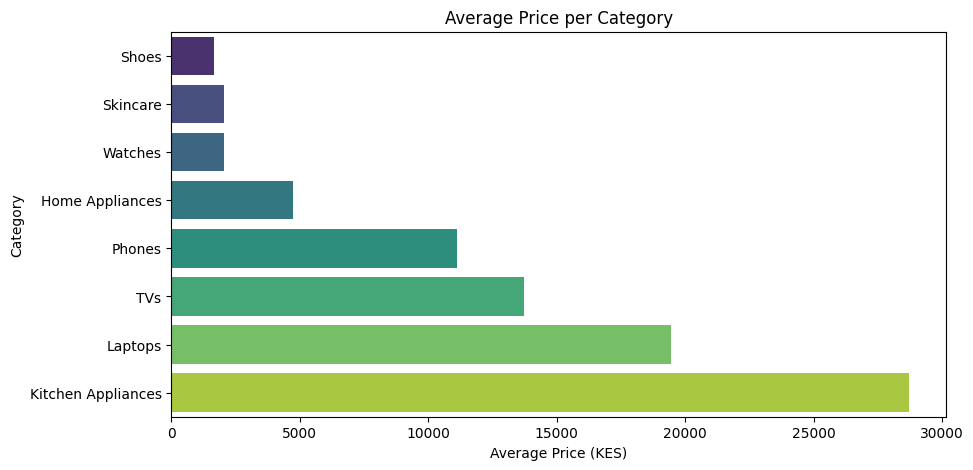

In [82]:
#   Average Price per Category
plt.figure(figsize=(10, 5))

sns.barplot(x=category_price.values, y=category_price.index, palette="viridis")
plt.xlabel("Average Price (KES)")
plt.ylabel("Category")
plt.title("Average Price per Category")
plt.show()

In [77]:
df.count()

Name               1489
Brand              1489
Price              1489
Old Price          1489
Discount           1489
Rating             1489
Review Count       1489
Type of Product    1489
Clean Name         1489
Storage            1489
More Details       1489
dtype: int64

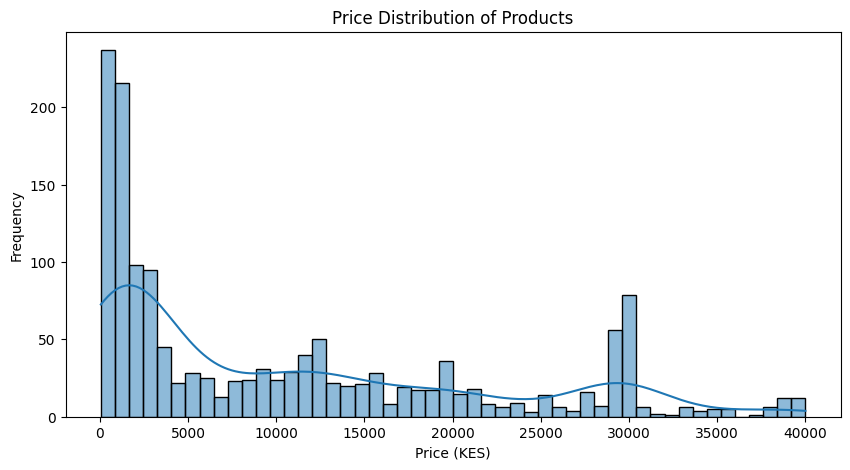

In [76]:
# Visualization: Price Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df["Price"], bins=50, kde=True)
plt.xlabel("Price (KES)")
plt.ylabel("Frequency")
plt.title("Price Distribution of Products")
plt.show()

In [80]:
brand_counts = df["Brand"].value_counts().head(10)
brand_counts

Brand
Fashion    116
HP         111
RAF         83
Vitron      70
Samsung     55
Lenovo      52
Nunix       48
XIAOMI      38
SADOER      31
Innovia     27
Name: count, dtype: int64

In [85]:
df.columns

Index(['Name', 'Brand', 'Price', 'Old Price', 'Discount', 'Rating',
       'Review Count', 'Type of Product', 'Clean Name', 'Storage',
       'More Details'],
      dtype='object')

In [90]:
# Group by 'Type of Product' and 'Brand', then count the occurrences
brand_counts_by_category= df.groupby(['Type of Product', 'Brand']).size().unstack().fillna(0) 

In [89]:
# Get the brand counts for Phones
phone_brand_counts = brand_counts_by_category.loc['Phones'].sort_values(ascending=False)
phone_brand_counts

Brand
Samsung       46.0
XIAOMI        38.0
Tecno         21.0
Infinix       19.0
Itel          17.0
              ... 
SmartBerry     0.0
Smart2030      0.0
Smart          0.0
Skyworth       0.0
1.69"          0.0
Name: Phones, Length: 301, dtype: float64

C:\Users\Admin\AppData\Local\Temp\ipykernel_14876\3660792306.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_counts.values, y=brand_counts.index, palette="coolwarm")


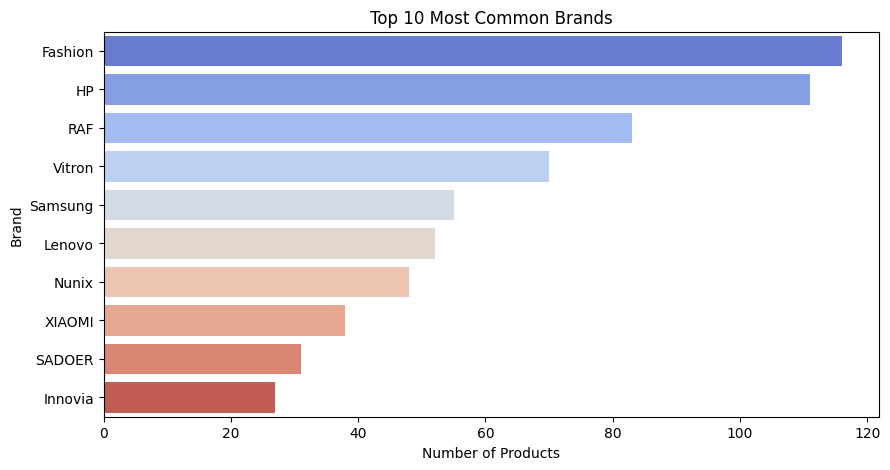

In [81]:
# Visualization: Top 10 Brands by Count
plt.figure(figsize=(10, 5))
sns.barplot(x=brand_counts.values, y=brand_counts.index, palette="coolwarm")
plt.xlabel("Number of Products")
plt.ylabel("Brand")
plt.title("Top 10 Most Common Brands")
plt.show()